# Complete the Machine Learning Prediction lab

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this lab, We will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)

Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)



Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


performs a controlled lanPerform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test datading in the oceans.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#This function is to plot the confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [3]:
import io
import requests
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
s=requests.get(URL1).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data.head()




,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
s=requests.get(URL2).content
X=pd.read_csv(io.StringIO(s.decode('utf-8')))
X.head()


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [5]:
Y = data['Class'].to_numpy()

In [6]:
#Standardize the data in X then reassign it to the variable X using the transform provided below.
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [8]:
y_test.shape

(18,)

In [9]:
# #Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10

parameters = {'C':[0.01, 0.1, 1], 'penalty':['l2'], 'solver':['lbfgs']}


In [10]:
parameters = {'C':[0.01, 0.1, 1], 'penalty':['l2'], 'solver':['lbfgs']}
lr = LogisticRegression(max_iter=1000)

In [11]:
# We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, y_train)

print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [12]:
# accuracy on the test data using the method score:
yhat = logreg_cv.predict(X_test)
logreg_score = logreg_cv.score(X_test, y_test)

print("Accuracy on test data: ", logreg_score)


Accuracy on test data:  0.8333333333333334


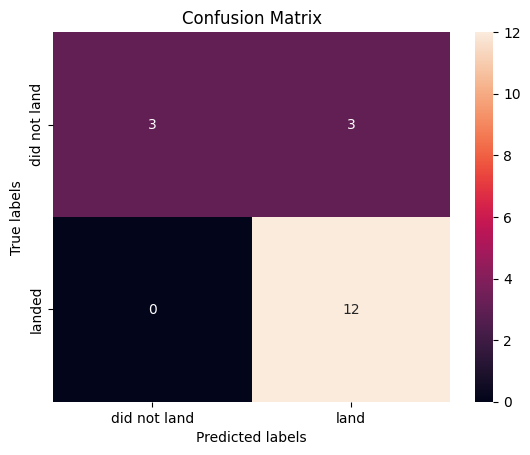

In [13]:
#Lets look at the confusion matrix:
plot_confusion_matrix(y_test, yhat)


Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)

In [14]:
"""from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # 'rbf' nur einmal
    'svm__C': np.logspace(-2, 2, 3),  # Weniger Werte
    'svm__gamma': np.logspace(-2, 2, 3)
}

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Skalierung der Daten
    ('svm', SVC())
])

# RandomizedSearchCV
svm_cv = RandomizedSearchCV(pipeline, parameters, n_iter=20, cv=5, random_state=42, n_jobs=-1)
svm_cv.fit(X_train, y_train)

# Ergebnisse ausgeben
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)"""

'from sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import RandomizedSearchCV\n\nparameters = {\n    \'svm__kernel\': [\'linear\', \'rbf\', \'poly\', \'sigmoid\'],  # \'rbf\' nur einmal\n    \'svm__C\': np.logspace(-2, 2, 3),  # Weniger Werte\n    \'svm__gamma\': np.logspace(-2, 2, 3)\n}\n\n# Pipeline\npipeline = Pipeline([\n    (\'scaler\', StandardScaler()),  # Skalierung der Daten\n    (\'svm\', SVC())\n])\n\n# RandomizedSearchCV\nsvm_cv = RandomizedSearchCV(pipeline, parameters, n_iter=20, cv=5, random_state=42, n_jobs=-1)\nsvm_cv.fit(X_train, y_train)\n\n# Ergebnisse ausgeben\nprint("Tuned hyperparameters (best parameters):", svm_cv.best_params_)\nprint("Accuracy:", svm_cv.best_score_)'

In [15]:
"""yhat=svm_cv.predict(X_test)
accuracy = svm_cv.score(X_test, y_test)
print("Accuracy on test data: ", accuracy)"""

'yhat=svm_cv.predict(X_test)\naccuracy = svm_cv.score(X_test, y_test)\nprint("Accuracy on test data: ", accuracy)'

In [16]:

#plot_confusion_matrix(y_test,yhat)

In [17]:
# Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

# We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, y_train)

print("tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)


tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [18]:
yhat=svm_cv.predict(X_test)
accuracy = svm_cv.score(X_test, y_test)
print("Accuracy on test data: ", accuracy)

Accuracy on test data:  0.8333333333333334


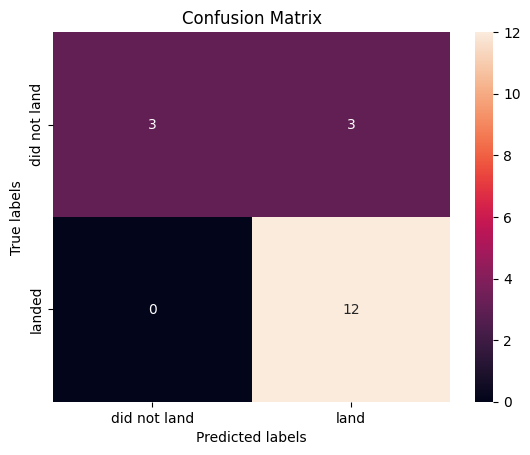

In [19]:
plot_confusion_matrix(y_test,yhat)

In [20]:
#Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}


tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, y_train)

print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)


tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8767857142857143


C:\Users\CC-Student\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CC-Student\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CC-Student\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\CC-Student\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _v

In [21]:
#calculate the accuracy on the test data using the method score:
yhat = tree_cv.predict(X_test)
tree_score = tree_cv.score(X_test, y_test)
tree_score


0.8333333333333334

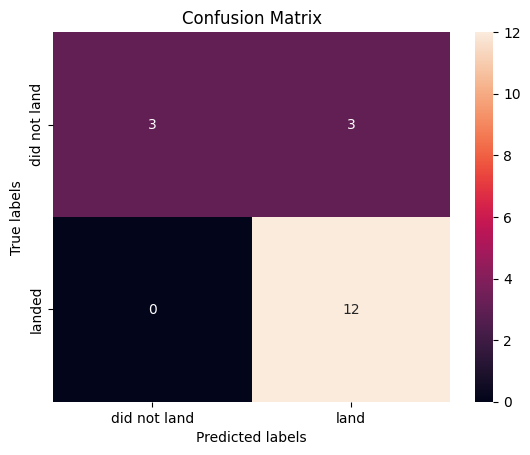

In [22]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [23]:
#Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [24]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [25]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [26]:
#Calculate the accuracy of knn_cv on the test data using the method score:
yhat = knn_cv.predict(X_test)
knn_score = knn_cv.score(X_test, y_test)
knn_score

0.8333333333333334

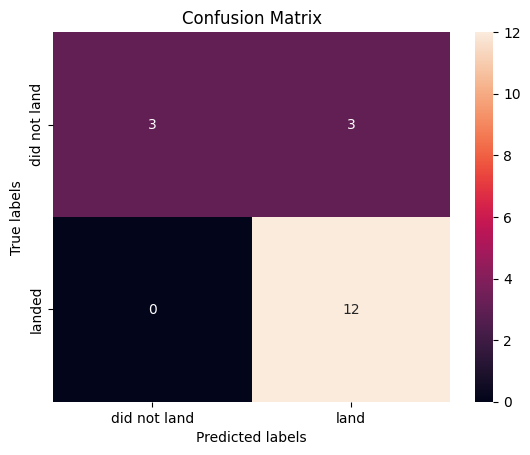

In [27]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

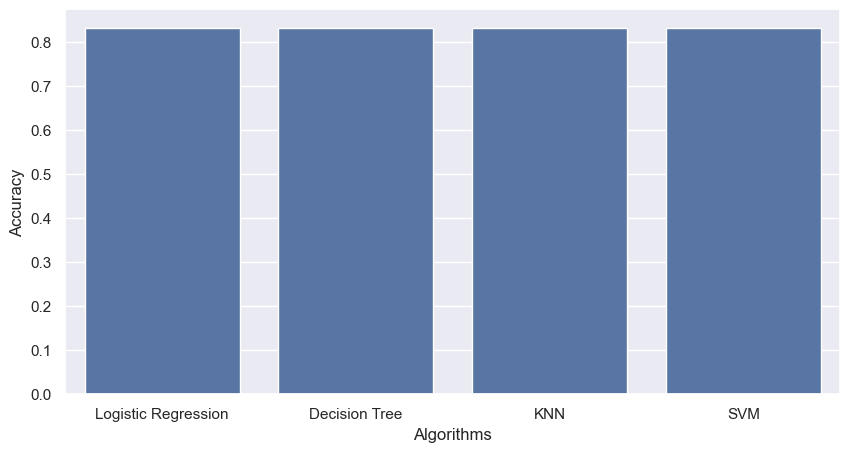

LogisticRegression : 0.8333333333333334 
DecisionTree : 0.8333333333333334 
KNN : 0.8333333333333334
svm_cv : 0.8333333333333334


In [28]:
#plot the method performs best:
#plot the method performs best:
scores = [logreg_score, tree_score, knn_score, accuracy]
algorithms = ["Logistic Regression", "Decision Tree", "KNN", "SVM"]
sns.set(rc={'figure.figsize':(10,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
sns.barplot(x=algorithms, y=scores)
plt.show()

#print the method that performs best:
print('LogisticRegression : {} \nDecisionTree : {} \nKNN : {}\nsvm_cv : {}'.format(logreg_score, tree_score, knn_score,accuracy))




